In [1]:
import numpy as np
from matplotlib import pyplot as plt

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [2]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2,random_state=180)

In [3]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

C:\Users\LAPTOP_MA\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.keras',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 24s 759ms/step - accuracy: 0.4771 - loss: 0.7963 - val_accuracy: 0.4955 - val_loss: 0.6882
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 21s 745ms/step - accuracy: 0.5858 - loss: 0.6683 - val_accuracy: 0.7909 - val_loss: 0.5388
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 21s 733ms/step - accuracy: 0.7808 - loss: 0.4847 - val_accuracy: 0.7955 - val_loss: 0.4583
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 20s 700ms/step - accuracy: 0.8509 - loss: 0.3721 - val_accuracy: 0.8182 - val_loss: 0.3877
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 20s 713ms/step - accuracy: 0.8627 - loss: 0.3067 - val_accuracy: 0.9091 - val_loss: 0.2317
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 19s 694ms/step - accuracy: 0.9400 - loss: 0.1606 - val_accuracy: 0.9273 - val_loss: 0.1764
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 19s 687ms/step - accuracy: 0.9492 - loss: 0.1269 - val_accuracy: 0.9500 - val_loss: 0.1318
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 20s 702ms/step - accuracy: 0.9805 - loss: 0.0775 - val_accu

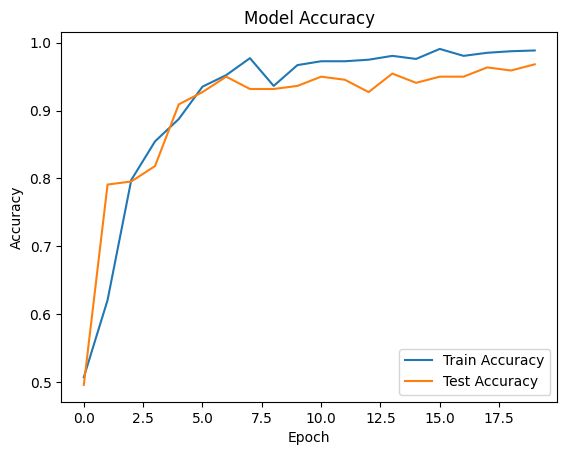

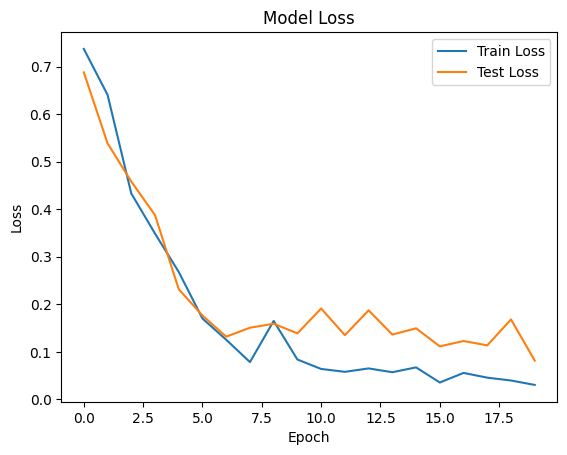

<Figure size 640x480 with 0 Axes>

In [6]:

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()
plt.savefig("Model Accurac")

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
plt.savefig("Model Loss")